# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Exploring and Preparing Data


----


### Import Libraries and Define Auxiliary Functions


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis 


In [7]:
# Reading SpaceX dataset into Pandas
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


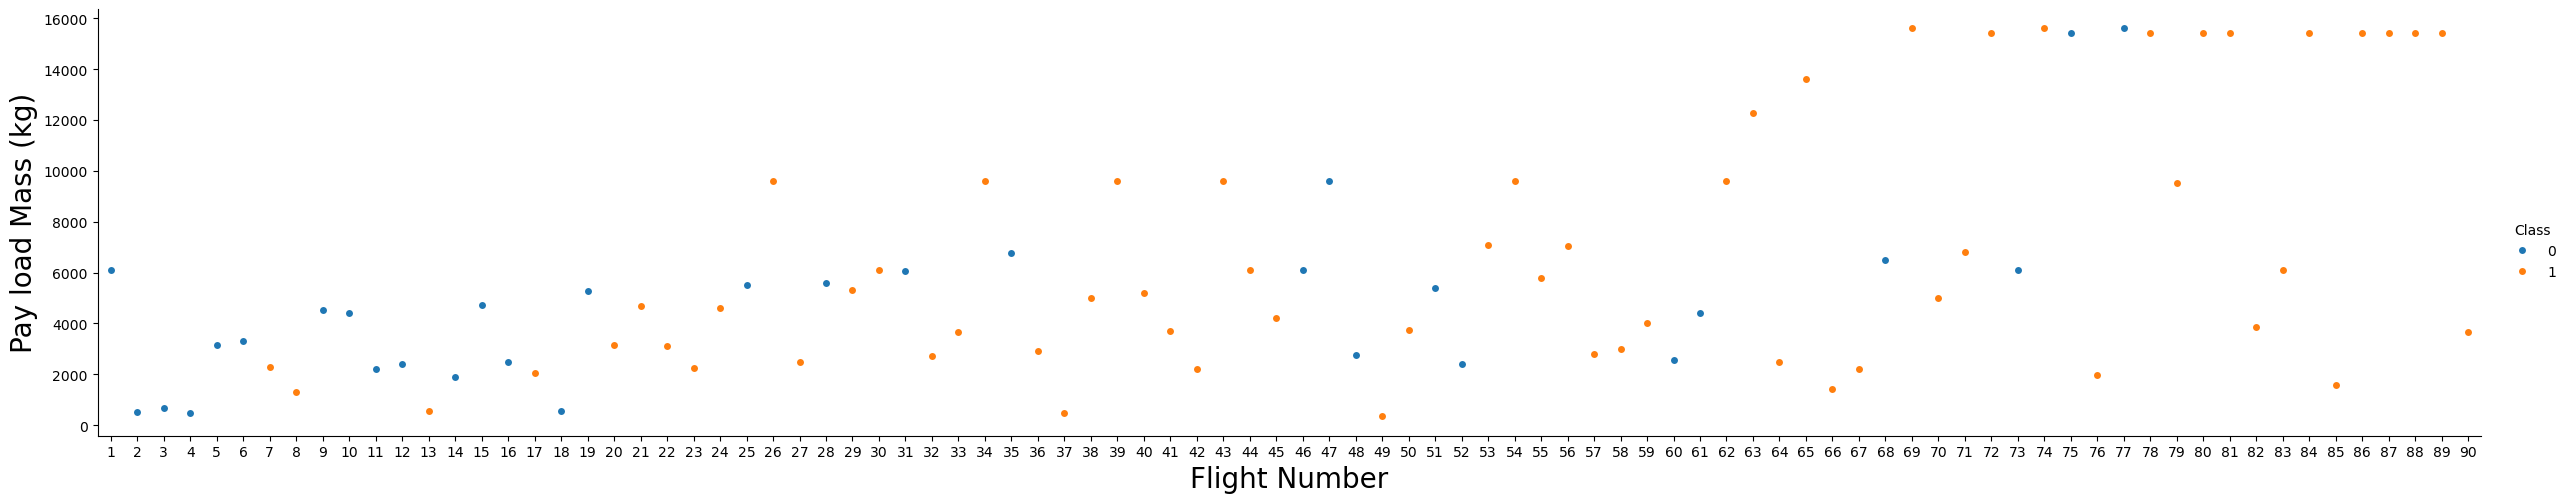

In [8]:
# FlightNumber vs. PayloadMass
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

### Visualize the relationship between Flight Number and Launch Site


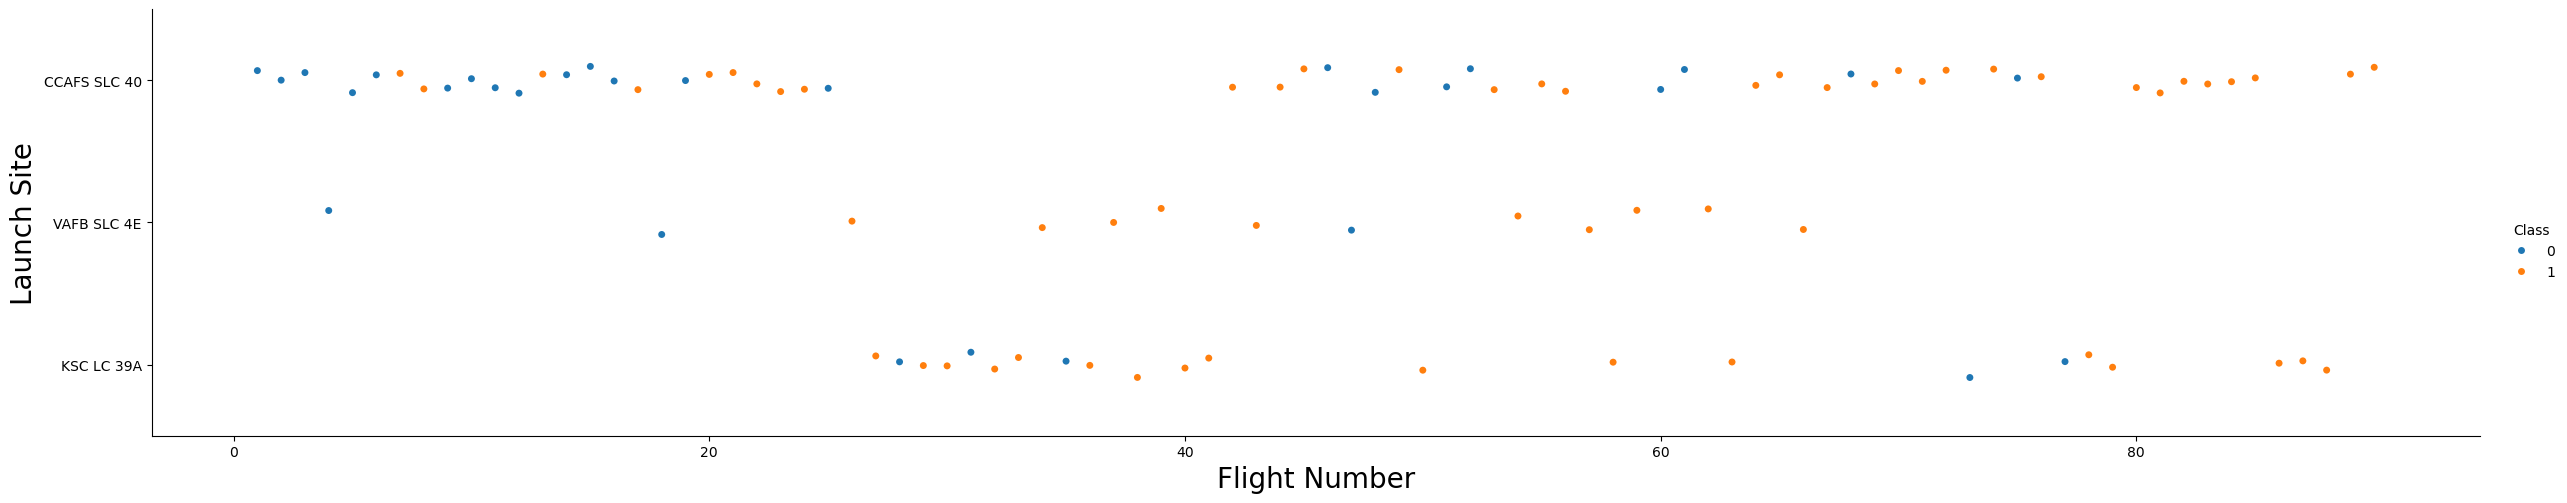

In [9]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

### Visualize the relationship between Payload and Launch Site


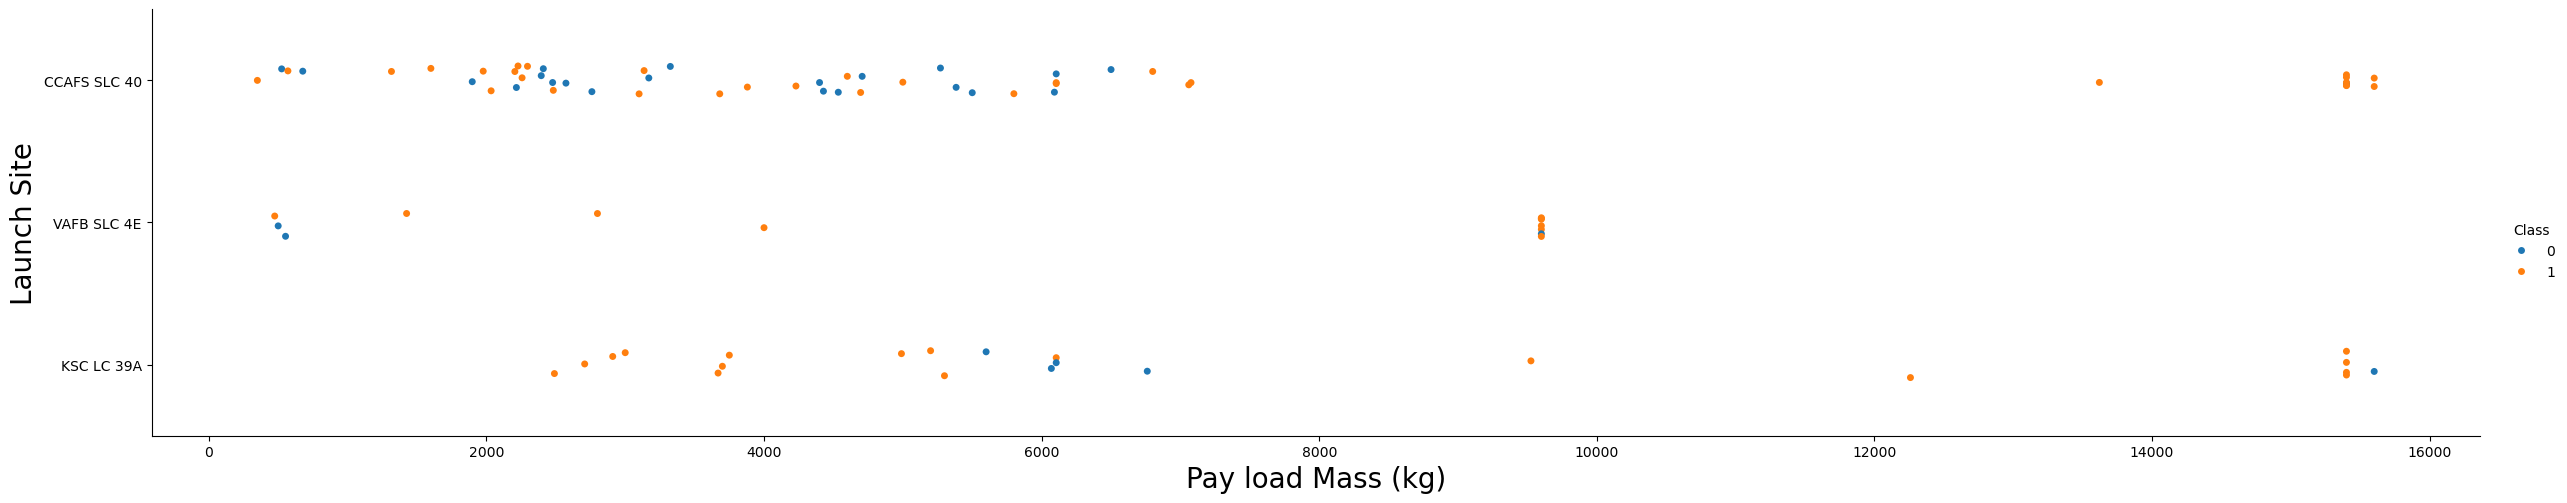

In [10]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

### Visualize the relationship between success rate of each orbit type


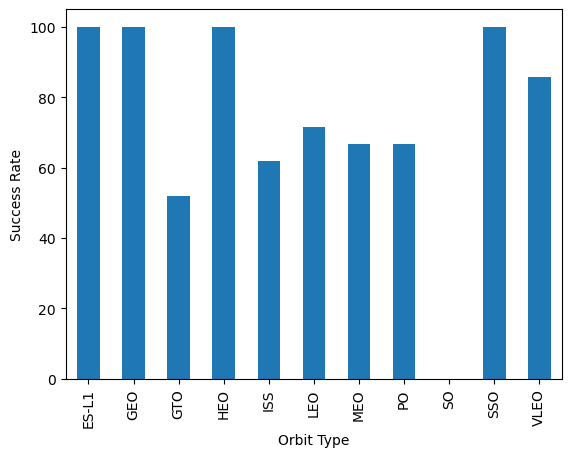

In [11]:
s_rate_orbit = df.groupby('Orbit')['Class'].mean() * 100
s_rate_orbit.plot(kind = 'bar')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.show()

### Visualize the relationship between FlightNumber and Orbit type


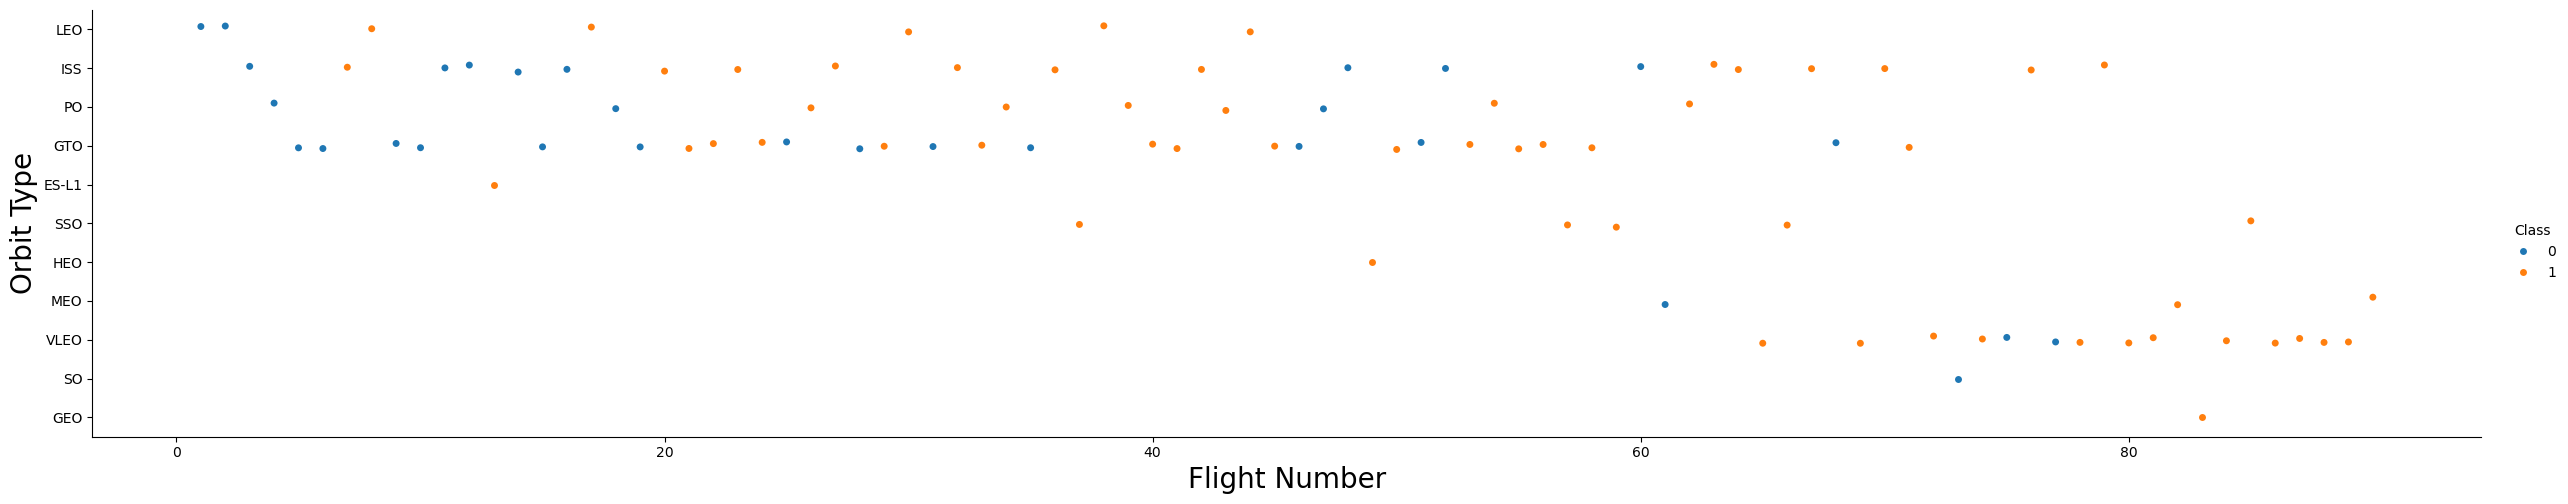

In [12]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()

### Visualize the relationship between Payload and Orbit type


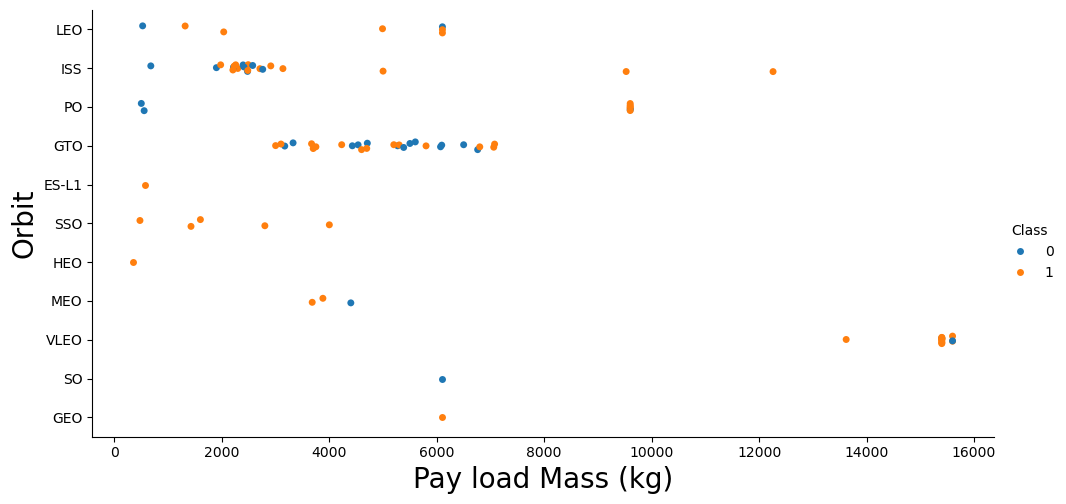

In [13]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 2)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

### Visualize the launch success yearly trend


In [14]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

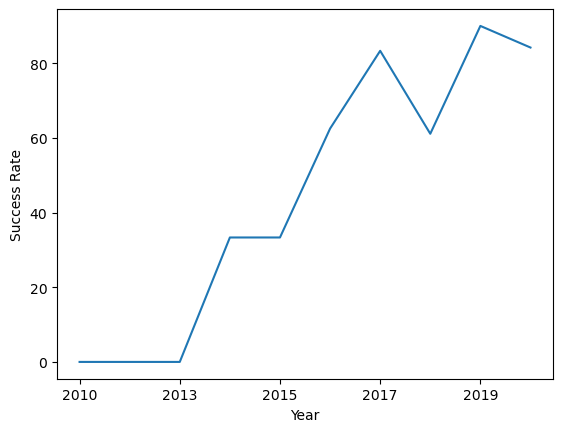

In [15]:
Extract_year()
df['Year'] = pd.Series(year)
s_rate_year = df.groupby('Year')['Class'].mean() * 100
s_rate_year.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.show()

## Features Engineering 


In [16]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

 ### Create dummy variables to categorical columns


In [17]:
orbit_dummy = pd.get_dummies(features['Orbit'])
orbit_dummy.rename(columns={'LEO':'orbit-LEO', 'ISS':'orbit-ISS', 'PO':'orbit-PO', 'GTO':'orbit-GTO', 'ES-L1':'orbit-ES-L1', 'SSO':'orbit-SSO', 'HEO':'orbit-HEO', 'MEO':'orbit-MEO', 'VLEO':'orbit-VLEO', 'SO':'orbit-SO', 'GEO':'orbit-GEO'}, inplace=True)
LaunchSite_dummy = pd.get_dummies(features['LaunchSite'])
LaunchSite_dummy.rename(columns={'CCAFS LC-40':'LaunchSite-CCAFS LC-40', 'VAFB SLC-4E':'LaunchSite-VAFB SLC-4E','KSC LC-39A':'LaunchSite-KSC LC-39A','CCAFS SLC-40':'LaunchSite-CCAFS SLC-40'}, inplace=True)
LandingPad_dummy = pd.get_dummies(features['LandingPad'])
LandingPad_dummy.rename(columns={'5e9e3032383ecb761634e7cb':'LandingPad-5e9e3032383ecb761634e7cb', '5e9e3032383ecb6bb234e7ca':'LandingPad-5e9e3032383ecb6bb234e7ca', '5e9e3032383ecb267a34e7c7':'LandingPad-5e9e3032383ecb267a34e7c7', '5e9e3033383ecbb9e534e7cc':'LandingPad-5e9e3033383ecbb9e534e7cc', '5e9e3032383ecb554034e7c9':'LandingPad-5e9e3032383ecb554034e7c9'}, inplace=True)
Serial_dummy = pd.get_dummies(features['Serial'])
features_one_hot = pd.concat([features, orbit_dummy, LaunchSite_dummy, LandingPad_dummy, Serial_dummy], axis = 1)
features_one_hot.drop(['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], axis=1, inplace=True)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,orbit-ES-L1,orbit-GEO,...,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
features_one_hot.astype('float64')

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,orbit-ES-L1,orbit-GEO,...,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
# features_one_hot.to_csv('dataset_part_3.csv', index=False)